In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

train_data = pd.read_csv('Dataset/train.csv', index_col='pet_id')
test_data = pd.read_csv('Dataset/test.csv', index_col='pet_id')

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train_data['color_type_encoded'] = encoder.fit_transform(train_data.color_type)
test_data['color_type_encoded'] = encoder.transform(test_data.color_type)


np.random.seed(42)
train_condition=np.random.choice(np.arange(0, 3), p=[6281/17357,6819/17357,4257/17357], size=1477)
test_condition = np.random.choice(np.arange(0,3), p=[2685/7453,2928/7453,1840/7453], size=619)

train_data['condition_filled'] = 0
test_data['condition_filled'] = 0

train_data.loc[train_data.condition.isnull(), 'condition_filled'] = 1
test_data.loc[test_data.condition.isnull(), 'condition_filled'] = 1

train_data.loc[train_data.condition.isnull(), 'condition'] = train_condition
test_data.loc[test_data.condition.isnull(), 'condition'] = test_condition

train_data['issue_date'] = pd.to_datetime(train_data.issue_date)
train_data['listing_date'] = pd.to_datetime(train_data.listing_date)
                                            
test_data['issue_date'] = pd.to_datetime(test_data.issue_date)
test_data['listing_date'] = pd.to_datetime(test_data.listing_date)

train_data['issue_year'] = train_data.issue_date.dt.year
train_data['issue_month'] = train_data.issue_date.dt.month
train_data['issue_day'] = train_data.issue_date.dt.day

train_data['listing_year'] = train_data.listing_date.dt.year
train_data['listing_month'] = train_data.listing_date.dt.month
train_data['listing_day'] = train_data.listing_date.dt.day

test_data['issue_year'] = test_data.issue_date.dt.year
test_data['issue_month'] = test_data.issue_date.dt.month
test_data['issue_day'] = test_data.issue_date.dt.day

test_data['listing_year'] = test_data.listing_date.dt.year
test_data['listing_month'] = test_data.listing_date.dt.month
test_data['listing_day'] = test_data.listing_date.dt.day

train_data['total_days'] = np.array(train_data.listing_date-train_data.issue_date).astype('timedelta64[D]').astype('int64')
test_data['total_days'] = np.array(test_data.listing_date-test_data.issue_date).astype('timedelta64[D]').astype('int64')

train_data['length(cm)'] = train_data['length(m)']*100
test_data['length(cm)'] = test_data['length(m)']*100

train_data['rec_area'] = train_data['length(cm)'] * train_data['height(cm)']
test_data['rec_area'] = test_data['length(cm)'] * test_data['height(cm)']

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
n_estimators = [i for i in range(100,1001,100)]
features = ['condition', 'length(cm)', 'height(cm)','rec_area', 'X1', 'X2', 'color_type_encoded',
           'issue_year', 'issue_month', 'issue_day', 'listing_year', 'listing_month', 'listing_day', 'total_days']
X = train_data[features].values
y_pet = train_data['pet_category'].values
y_breed = train_data['breed_category'].values
scores = []

In [16]:
X_pet_train, X_pet_valid, y_pet_train, y_pet_valid = train_test_split(X, y_pet, test_size=0.20)
X_breed_train, X_breed_valid, y_breed_train, y_breed_valid = train_test_split(X, y_breed, test_size=0.20)
 
for n in n_estimators:
    print('Fitting the models for n_estimators:', n)
    pet_model = GradientBoostingClassifier(random_state=13, n_estimators=n)
    pet_model.fit(X_pet_train, y_pet_train)
    
    breed_model = GradientBoostingClassifier(random_state=13, n_estimators=n)
    breed_model.fit(X_breed_train, y_breed_train)
    
    scores.append(np.array([pet_model.score(X_pet_valid, y_pet_valid), breed_model.score(X_breed_valid, y_breed_valid)]))    

Fitting the models for n_estimators: 100
Fitting the models for n_estimators: 200
Fitting the models for n_estimators: 300
Fitting the models for n_estimators: 400
Fitting the models for n_estimators: 500
Fitting the models for n_estimators: 600
Fitting the models for n_estimators: 700
Fitting the models for n_estimators: 800
Fitting the models for n_estimators: 900
Fitting the models for n_estimators: 1000


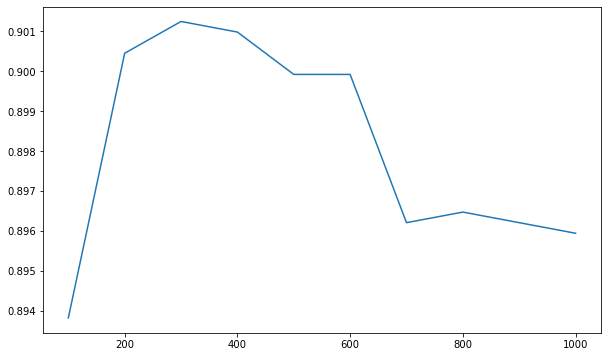

In [17]:
scores = np.array(scores)
pet_score = scores[:,0]
breed_score = scores[:,1]
plt.figure(figsize=(10,6))
pet_plot = plt.plot(n_estimators, pet_score)

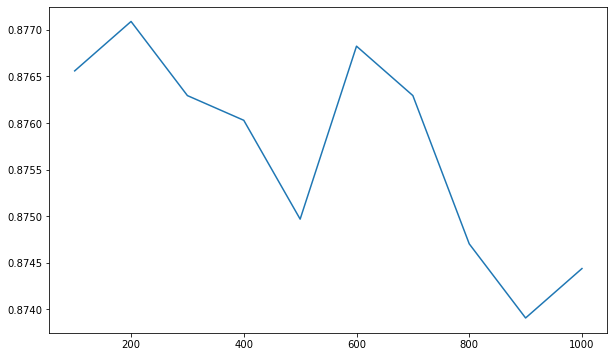

In [18]:
 
plt.figure(figsize=(10,6))
breed_plot=plt.plot(n_estimators, breed_score)

In [19]:
scores

array([[0.89381471, 0.8765596 ],
       [0.90045129, 0.87709052],
       [0.90124768, 0.87629413],
       [0.90098221, 0.87602867],
       [0.89992036, 0.87496682],
       [0.89992036, 0.87682506],
       [0.89620388, 0.87629413],
       [0.89646934, 0.87470135],
       [0.89620388, 0.87390496],
       [0.89593841, 0.87443589]])

In [27]:
import multiprocessing
pet_scores = []
breed_scores = []

def task1(n):
    
    pet_model = GradientBoostingClassifier(random_state=13, n_estimators=n)
    pet_model.fit(X_pet_train, y_pet_train)
    print("pet_model for n:",n)
    

def task2(n):
    
    pet_model = GradientBoostingClassifier(random_state=13, n_estimators=n)
    pet_model.fit(X_pet_train, y_pet_train)
    print("pet_model for n:",n)


def task3(n):
    
    breed_model = GradientBoostingClassifier(random_state=13, n_estimators=n)
    breed_model.fit(X_breed_train, y_breed_train)
    print("breed_model for n:",n)


def task4(n):
    
    breed_model = GradientBoostingClassifier(random_state=13, n_estimators=n)
    breed_model.fit(X_breed_train, y_breed_train)
    print("breed_model for n:",n)

processes = []

for i in range(len(n_estimators)-1):
    p = multiprocessing.Process(target=task1, args=(n_estimators[i],))
    processes.append(p)
    p.start()
    
    p = multiprocessing.Process(target=task2, args=(n_estimators[i],))
    processes.append(p)
    p.start()
    
    p = multiprocessing.Process(target=task3, args=(n_estimators[i+1],))
    processes.append(p)
    p.start()
    
    p = multiprocessing.Process(target=task4, args=(n_estimators[i+1],))
    processes.append(p)
    p.start()
    


In [28]:
for process in  processes:
    process.join()

In [30]:
from sklearn.ensemble import AdaBoostClassifier

x = AdaBoostClassifier(random_state=13)

In [31]:
x.fit(X_pet_train, y_pet_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=13)

In [32]:
x.score(X_pet_valid, y_pet_valid)

0.8080700822936023

In [34]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(random_state=13)
bagging.fit(X_pet_train, y_pet_train)
print("score:", bagging.score(X_pet_valid, y_pet_valid))

score: 0.877621449429254


In [35]:
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier(random_state=13)
print(extra.fit(X_pet_train, y_pet_train))
print('score:',extra.score(X_pet_valid, y_pet_valid))

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=13, verbose=0,
                     warm_start=False)
score: 0.8242633395274754


In [36]:
from  sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=13, n_jobs=4)
print(rf.fit(X_pet_train, y_pet_train))
print('Score:', rf.score(X_pet_valid, y_pet_valid))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
Score: 0.8704539421290152


In [53]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X=X_pet_train, y=y_pet_train)
print('score:', svc.score(X_pet_valid, y_pet_valid))

score: 0.6657817892221928


In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train_data['color_type_encoded'] = encoder.fit_transform(train_data.color_type)
test_data['color_type_encoded'] = encoder.transform(test_data.color_type)


"""np.random.seed(42)
train_condition=np.random.choice(np.arange(0, 3), p=[6281/17357,6819/17357,4257/17357], size=1477)
test_condition = np.random.choice(np.arange(0,3), p=[2685/7453,2928/7453,1840/7453], size=619)

train_data['condition_filled'] = 0
test_data['condition_filled'] = 0

train_data.loc[train_data.condition.isnull(), 'condition_filled'] = 1
test_data.loc[test_data.condition.isnull(), 'condition_filled'] = 1

train_data.loc[train_data.condition.isnull(), 'condition'] = train_condition
test_data.loc[test_data.condition.isnull(), 'condition'] = test_condition"""

train_data['issue_date'] = pd.to_datetime(train_data.issue_date)
train_data['listing_date'] = pd.to_datetime(train_data.listing_date)
                                            
test_data['issue_date'] = pd.to_datetime(test_data.issue_date)
test_data['listing_date'] = pd.to_datetime(test_data.listing_date)

train_data['issue_year'] = train_data.issue_date.dt.year
train_data['issue_month'] = train_data.issue_date.dt.month
train_data['issue_day'] = train_data.issue_date.dt.day

train_data['listing_year'] = train_data.listing_date.dt.year
train_data['listing_month'] = train_data.listing_date.dt.month
train_data['listing_day'] = train_data.listing_date.dt.day

test_data['issue_year'] = test_data.issue_date.dt.year
test_data['issue_month'] = test_data.issue_date.dt.month
test_data['issue_day'] = test_data.issue_date.dt.day

test_data['listing_year'] = test_data.listing_date.dt.year
test_data['listing_month'] = test_data.listing_date.dt.month
test_data['listing_day'] = test_data.listing_date.dt.day

train_data['total_days'] = np.array(train_data.listing_date-train_data.issue_date).astype('timedelta64[D]').astype('int64')
test_data['total_days'] = np.array(test_data.listing_date-test_data.issue_date).astype('timedelta64[D]').astype('int64')

train_data['length(cm)'] = train_data['length(m)']*100
test_data['length(cm)'] = test_data['length(m)']*100

train_data['rec_area'] = train_data['length(cm)'] * train_data['height(cm)']
test_data['rec_area'] = test_data['length(cm)'] * test_data['height(cm)']

In [9]:
train_data = train_data.sort_values(by='condition')

In [12]:
X_condition = train_data.condition.values

In [18]:
train_data.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,color_type_encoded,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day,total_days,length(cm),rec_area
pet_id,,,,,,,,,,,,,,,,,,,,
ANSL_63072,2017-12-03,2018-05-08 15:05:00,0.0,Black,0.68,24.49,0,1,1.0,1,2,2017,12,3,2018,5,8,156,68.0,1665.32
ANSL_62472,2016-06-20,2016-10-12 00:00:00,0.0,White,0.94,17.11,13,9,1.0,1,53,2016,6,20,2016,10,12,114,94.0,1608.34
ANSL_76284,2015-04-06,2019-04-29 18:50:00,0.0,White,0.18,40.31,0,7,1.0,2,53,2015,4,6,2019,4,29,1484,18.0,725.58
ANSL_67891,2015-12-25,2018-07-23 17:06:00,0.0,Gray,1.00,8.76,0,7,1.0,2,30,2015,12,25,2018,7,23,941,100.0,876.00
ANSL_63665,2013-08-01,2018-09-03 09:17:00,0.0,Tan,0.59,39.04,7,1,1.0,2,48,2013,8,1,2018,9,3,1859,59.0,2303.36


In [19]:
train_data['X1X2'] = train_data.X1*train_data.X2

In [21]:
train_data['CX1'] = train_data.color_type_encoded*train_data.X1

In [22]:

train_data['CX2'] = train_data.color_type_encoded*train_data.X2

In [23]:
train_data['CX1X2'] = train_data.color_type_encoded + train_data.X1 + train_data.X2

In [24]:
train_data['crec'] = train_data.color_type_encoded * train_data.rec_area

In [26]:
train_data['X1X2rec_area'] = train_data.X1X2*train_data.rec_area

In [82]:
train_data['X1totdays'] = train_data.X1*train_data.total_days

In [83]:
train_data['X2totdays'] = train_data.X2*train_data.total_days

In [27]:
train_data.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,...,listing_day,total_days,length(cm),rec_area,X1X2,CX1,CX2,CX1X2,crec,X1X2rec_area
pet_id,,,,,,,,,,,,,,,,,,,,,
ANSL_63072,2017-12-03,2018-05-08 15:05:00,0.0,Black,0.68,24.49,0,1,1.0,1,...,8,156,68.0,1665.32,0,0,2,3,3330.64,0.00
ANSL_62472,2016-06-20,2016-10-12 00:00:00,0.0,White,0.94,17.11,13,9,1.0,1,...,12,114,94.0,1608.34,117,689,477,75,85242.02,188175.78
ANSL_76284,2015-04-06,2019-04-29 18:50:00,0.0,White,0.18,40.31,0,7,1.0,2,...,29,1484,18.0,725.58,0,0,371,60,38455.74,0.00
ANSL_67891,2015-12-25,2018-07-23 17:06:00,0.0,Gray,1.00,8.76,0,7,1.0,2,...,23,941,100.0,876.00,0,0,210,37,26280.00,0.00
ANSL_63665,2013-08-01,2018-09-03 09:17:00,0.0,Tan,0.59,39.04,7,1,1.0,2,...,3,1859,59.0,2303.36,7,336,48,56,110561.28,16123.52


In [104]:
features = ['length(cm)', 'height(cm)','rec_area', 'X1', 'X2', 'color_type_encoded',
           'issue_year', 'issue_month', 'issue_day', 'listing_year', 'listing_month', 'listing_day', 'total_days']

#,'X1X2','CX1', 'CX2', 'CX1X2', 'crec', 'X1X2rec_area', 'X1totdays', 'X2totdays'
y_condition = train_data.loc[train_data.condition.isnull()==False,'condition']
X_condition = train_data.loc[train_data.condition.isnull()==False, features]


In [105]:
X_condition

,length(cm),height(cm),rec_area,X1,X2,color_type_encoded,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day,total_days
pet_id,,,,,,,,,,,,,
ANSL_63072,68.0,24.49,1665.32,0,1,2,2017,12,3,2018,5,8,156
ANSL_62472,94.0,17.11,1608.34,13,9,53,2016,6,20,2016,10,12,114
ANSL_76284,18.0,40.31,725.58,0,7,53,2015,4,6,2019,4,29,1484
ANSL_67891,100.0,8.76,876.00,0,7,30,2015,12,25,2018,7,23,941
ANSL_63665,59.0,39.04,2303.36,7,1,48,2013,8,1,2018,9,3,1859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ANSL_62178,7.0,21.40,149.80,13,9,18,2017,10,11,2017,12,15,65
ANSL_65065,93.0,24.62,2289.66,0,7,7,2012,2,9,2016,8,31,1665
ANSL_54518,60.0,9.05,543.00,7,1,2,2016,8,12,2017,3,26,226


In [106]:
from  sklearn.ensemble import GradientBoostingClassifier



In [107]:
from sklearn.model_selection import train_test_split

X_c_train, X_c_valid, y_c_train, y_c_valid = train_test_split(X_condition, y_condition, test_size=0.80)

In [108]:
scores = []
for i in range(100,1001,100):
    condition_gbr = GradientBoostingClassifier(random_state=13, n_estimators=i)
    condition_gbr.fit(X_c_train, y_c_train)
    scores.append(condition_gbr.score(X_c_valid, y_c_valid))
    #52.81

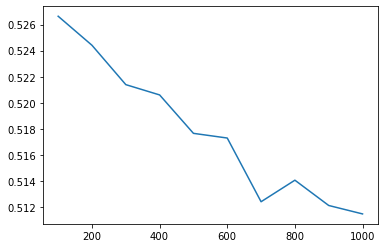

In [103]:
plt.plot([i for i in range(100,1001,100)], scores)

In [51]:
from sklearn.ensemble import BaggingClassifier

condition_bagging = BaggingClassifier(random_state=13)
condition_bagging.fit(X_c_train, y_c_train).score(X_c_valid, y_c_valid)

0.49647126602333286

In [52]:
preds = condition_gbr.predict(X_c_valid)

<Figure size 432x288 with 0 Axes>

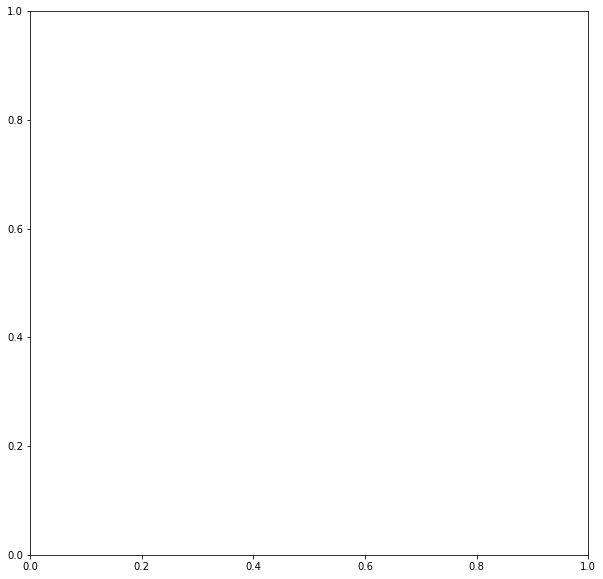

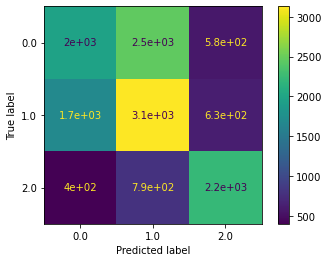

In [61]:
from sklearn.metrics import plot_confusion_matrix
plt.figure()
fig,ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(condition_gbr, X_c_valid, y_c_valid)

<BarContainer object of 13886 artists>

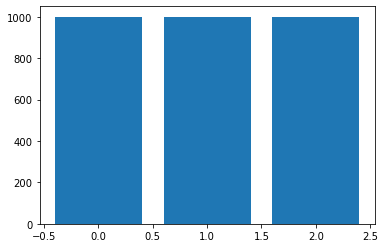

In [63]:
plt.bar(preds, height=1000)

In [65]:
type(preds)

numpy.ndarray

<BarContainer object of 3 artists>

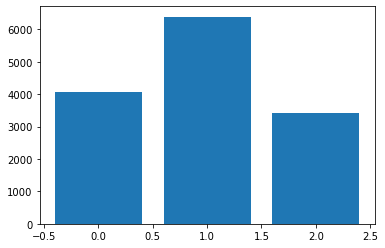

In [76]:
plt.bar([0,1,2],np.unique(preds, return_counts=True)[1])

<BarContainer object of 3 artists>

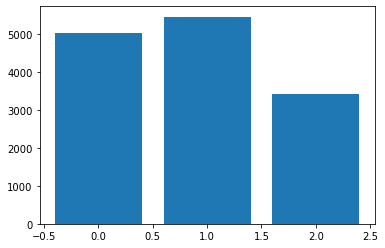

In [78]:
plt.bar([0,1,2], np.unique(y_c_valid, return_counts=True)[1])

In [79]:
np.sum(preds==y_c_valid)

7332

In [80]:
preds.shape

(13886,)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit